In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

### Reading data

In [5]:
data = pd.read_excel('cleaned_Travelpac_removed_outliers.xlsx', 'Sheet1')
print(data.shape)
data.head()

(206222, 13)


,Age,Duration_of_Visit,Holiday_Package,Sex,Year,country,mode,purpose,quarter,where_contact_lives,visits,nights,Amount_Spent
0,0-15,4-13 nights,Independent,Male,2009,Austria,Air,Holiday,Jan-Mar,UK residents,1600.680374,11204.762616,1.103402e+06
1,0-15,4-13 nights,Independent,Female,2009,Austria,Air,Holiday,Jan-Mar,UK residents,1600.680374,11204.762616,1.125278e+06
2,16-24,4-13 nights,Independent,Male,2009,Austria,Air,Holiday,Jan-Mar,UK residents,3064.743058,20873.377956,1.622982e+06
3,16-24,4-13 nights,Independent,Female,2009,Austria,Air,Holiday,Jan-Mar,UK residents,2702.755561,12411.702616,1.164191e+06
4,16-24,14-27 nights,Independent,Female,2009,Austria,Air,Holiday,Jan-Mar,UK residents,525.351507,7354.921102,7.633357e+05


In [6]:
data.describe()

,Year,visits,nights,Amount_Spent
count,206222.000000,206222.000000,206222.000000,2.062220e+05
mean,2014.101037,2353.401800,15389.519784,9.694865e+05
std,3.373543,2191.406930,17241.383611,1.061189e+06
min,2009.000000,323.352139,323.630576,1.948263e+04
25%,2011.000000,887.370255,3896.952189,2.494504e+05
50%,2014.000000,1537.913010,8907.577256,5.780058e+05
75%,2017.000000,2966.835172,19902.201613,1.284098e+06
max,2021.000000,11981.211975,98327.664924,6.008109e+06


# Model to predict holiday package
### Splittin data into target and feature variables

In [7]:
#target variable
labels = data['Holiday_Package']
#Include all other variables as feature variables
features = data[['Age','Sex','country','Duration_of_Visit','Year','mode',
                     'purpose','quarter','where_contact_lives', 'visits','nights', 'Amount_Spent']]

print(f'label shape {labels.shape}')
print('First Five sample dataset for labels')
print(f'features shape {features.shape}')
print(labels.head())
features.head()

label shape (206222,)
First Five sample dataset for labels
features shape (206222, 12)
0    Independent
1    Independent
2    Independent
3    Independent
4    Independent
Name: Holiday_Package, dtype: object


,Age,Sex,country,Duration_of_Visit,Year,mode,purpose,quarter,where_contact_lives,visits,nights,Amount_Spent
0,0-15,Male,Austria,4-13 nights,2009,Air,Holiday,Jan-Mar,UK residents,1600.680374,11204.762616,1.103402e+06
1,0-15,Female,Austria,4-13 nights,2009,Air,Holiday,Jan-Mar,UK residents,1600.680374,11204.762616,1.125278e+06
2,16-24,Male,Austria,4-13 nights,2009,Air,Holiday,Jan-Mar,UK residents,3064.743058,20873.377956,1.622982e+06
3,16-24,Female,Austria,4-13 nights,2009,Air,Holiday,Jan-Mar,UK residents,2702.755561,12411.702616,1.164191e+06
4,16-24,Female,Austria,14-27 nights,2009,Air,Holiday,Jan-Mar,UK residents,525.351507,7354.921102,7.633357e+05


In [8]:
# Split our data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(features,
                                                          labels,
                                                          test_size=0.3,
                                                          random_state=42)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(144355, 12)
(61867, 12)
(144355,)
(61867,)


In [9]:
X_test.head()

,Age,Sex,country,Duration_of_Visit,Year,mode,purpose,quarter,where_contact_lives,visits,nights,Amount_Spent
158093,16-24,Male,Netherlands,28-90 nights,2017,Air,Study,Apr-Jun,Overseas residents,546.525288,28965.840286,409893.966318
110886,25-34,Male,Cyprus EU,1-3 nights,2014,Air,VFR,Oct-Dec,Overseas residents,1325.354132,3976.062397,550021.964915
2913,16-24,Male,Italy,28-90 nights,2009,Air,Study,Jan-Mar,Overseas residents,588.379772,34714.406542,891395.354433
108067,45-54,Male,Netherlands,1-3 nights,2014,Sea,Holiday,Jul-Sep,Overseas residents,2474.243745,6822.376584,538374.956810
180709,35-44,Male,Lithuania,1-3 nights,2018,Air,Business,Oct-Dec,Overseas residents,2895.963233,5791.926467,43439.448500


In [10]:
#Pre-processing categorical variables

#For training data set 
X_train_cat = pd.DataFrame(X_train[['Age','Sex','country','Duration_of_Visit','mode',
                     'purpose','quarter','where_contact_lives']])
X_train_cat_encoded = pd.get_dummies(X_train_cat)
print(f" The shape of X_train_cat_encoded is: {X_train_cat_encoded.shape}")
print(X_train_cat_encoded.head(2))

#For testing data set
X_test_cat = pd.DataFrame(X_test[['Age','Sex','country','Duration_of_Visit','mode',
                                  'purpose','quarter','where_contact_lives']])
X_test_cat_encoded = pd.get_dummies(X_test_cat)
print(f" The shape of X_test_cat_encoded is: {X_test_cat_encoded.shape}")
print(X_test_cat_encoded.head(2))     

 The shape of X_train_cat_encoded is: (144355, 64)
       Age_0-15  Age_16-24  Age_25-34  Age_35-44  Age_45-54  Age_55-64  \
22174         0          0          0          0          1          0   
62749         0          1          0          0          0          0   

       Age_65 & over  Sex_Female  Sex_Male  country_Austria  ...  \
22174              0           1         0                0  ...   
62749              0           0         1                0  ...   

       purpose_Holiday  purpose_Miscellaneous  purpose_Study  purpose_VFR  \
22174                0                      0              0            1   
62749                0                      0              0            1   

       quarter_Apr-Jun  quarter_Jan-Mar  quarter_Jul-Sep  quarter_Oct-Dec  \
22174                0                1                0                0   
62749                1                0                0                0   

       where_contact_lives_Overseas residents  \
22174   

In [11]:
#normalise the continuous variables (and Year) for training set 
X_train_cont = X_train[['visits','nights','Amount_Spent', 'Year']]
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X_train_cont)
X_train_cont_new = pd.DataFrame(x_scaled, columns=X_train_cont.columns, index=X_train_cont.index)
X_train_cont_new.head()

,visits,nights,Amount_Spent,Year
22174,0.027993,0.109390,0.016491,0.083333
62749,0.039849,0.052971,0.036214,0.250000
199723,0.130461,0.260130,0.275615,1.000000
164275,0.174176,0.116779,0.080854,0.666667
45781,0.092275,0.039522,0.074537,0.166667


In [12]:
#normalise the continuous variables (and Year) for testing set 
X_test_cont = X_test[['visits','nights','Amount_Spent', 'Year']]
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X_test_cont)
X_test_cont_new = pd.DataFrame(x_scaled, columns=X_test_cont.columns, index=X_test_cont.index)
X_test_cont_new.head()

,visits,nights,Amount_Spent,Year
158093,0.019144,0.292245,0.065191,0.666667
110886,0.085951,0.037254,0.088590,0.416667
2913,0.022734,0.350902,0.145594,0.000000
108067,0.184501,0.066297,0.086646,0.416667
180709,0.220676,0.055783,0.004000,0.750000


In [13]:
#Add DataFrame of continuous variables and categorical variables together for a complete training set
train_data = X_train_cat_encoded.join(X_train_cont)
#Do the same for test data
test_data = X_test_cat_encoded.join(X_test_cont)
print(train_data.shape)
print(test_data.shape)

(144355, 68)
(61867, 68)


### Initial Accuracy Test for Potential Models using K fold Evaluation

LR: 0.831769 (0.003155)
RF: 0.865554 (0.002942)
CART: 0.816335 (0.004170)
NB: 0.829621 (0.003447)


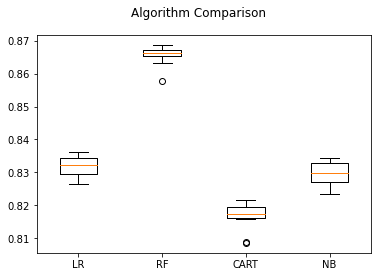

In [14]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(solver='sag')
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

X_train_1 = train_data.values
Y_train_1 = Y_train.values

seed = 7

models = []
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))
#models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))


#Evaluate each model
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state = seed , shuffle=True)
    cv_results = model_selection.cross_val_score(model,X_train_1 , Y_train.ravel(), cv=kfold, scoring=scoring)
    
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    
    print(msg)
    
#boxplot for comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Having applied KFold Validation to a number of possible classification algorithms, we have a strong accuracy rating from the following models:
###### Logistic Regression , Random Forests classifier, Decision Tree Classifier

we will select Random Forest classifier because it has the highest accuracy


In [15]:
model = RandomForestClassifier(n_estimators= 10 , random_state=42)
model.fit(train_data , Y_train )

RandomForestClassifier(n_estimators=10, random_state=42)

In [51]:
prediction_test =model.predict(test_data)

In [52]:
type(prediction_test)

numpy.ndarray

In [53]:
type(Y_train)

pandas.core.series.Series

In [54]:
print("Accuracy = " , metrics.accuracy_score(Y_test, prediction_test))

Accuracy =  0.8548014288716117


In [1]:
feature_list = list(train_data.columns)
feature_imp = pd.Series(model.feature_importances_ , index=feature_list).sort_values(ascending = False)

NameError: name 'train_data' is not defined

In [56]:
# Get the feature importance scores
importances = model.feature_importances_

# Sort the feature importance scores in descending order
indices = np.argsort(importances)[::-1]

# Print the feature names in order of importance
print('Feature importance:')
for i, feature in enumerate(train_data.columns[indices]):
    print(f'{i+1}. {feature}: {importances[indices[i]]:.4f}')

Feature importance:
1. Amount_Spent: 0.1389
2. nights: 0.1361
3. visits: 0.1318
4. Year: 0.0811
5. purpose_Holiday: 0.0637
6. purpose_VFR: 0.0380
7. purpose_Business: 0.0157
8. quarter_Jul-Sep: 0.0144
9. quarter_Apr-Jun: 0.0138
10. quarter_Jan-Mar: 0.0137
11. quarter_Oct-Dec: 0.0135
12. Sex_Female: 0.0135
13. Sex_Male: 0.0135
14. where_contact_lives_Overseas residents: 0.0133
15. Age_16-24: 0.0128
16. Age_25-34: 0.0127
17. Age_35-44: 0.0126
18. mode_Air: 0.0124
19. Age_45-54: 0.0121
20. Age_55-64: 0.0119
21. Age_0-15: 0.0113
22. Duration_of_Visit_4-13 nights: 0.0108
23. country_Germany: 0.0106
24. country_Spain: 0.0103
25. where_contact_lives_UK residents: 0.0102
26. mode_Sea: 0.0101
27. Age_65 & over: 0.0096
28. country_France: 0.0095
29. Duration_of_Visit_1-3 nights: 0.0081
30. mode_Tunnel: 0.0080
31. country_Italy: 0.0079
32. purpose_Miscellaneous: 0.0076
33. country_Irish Republic: 0.0066
34. country_Netherlands: 0.0065
35. Duration_of_Visit_14-27 nights: 0.0058
36. country_Poland:

([<matplotlib.axis.XTick at 0x2560c615bb0>,
 [Text(0, 0, 'Amount_Spent'),
  Text(1, 0, 'nights'),
  Text(2, 0, 'visits'),
  Text(3, 0, 'Year'),
  Text(4, 0, 'purpose_Holiday'),
  Text(5, 0, 'purpose_VFR'),
  Text(6, 0, 'purpose_Business'),
  Text(7, 0, 'quarter_Jul-Sep'),
  Text(8, 0, 'quarter_Apr-Jun'),
  Text(9, 0, 'quarter_Jan-Mar'),
  Text(10, 0, 'quarter_Oct-Dec'),
  Text(11, 0, 'Sex_Female'),
  Text(12, 0, 'Sex_Male'),
  Text(13, 0, 'where_contact_lives_Overseas residents'),
  Text(14, 0, 'Age_16-24'),
  Text(15, 0, 'Age_25-34'),
  Text(16, 0, 'Age_35-44'),
  Text(17, 0, 'mode_Air'),
  Text(18, 0, 'Age_45-54'),
  Text(19, 0, 'Age_55-64'),
  Text(20, 0, 'Age_0-15'),
  Text(21, 0, 'Duration_of_Visit_4-13 nights'),
  Text(22, 0, 'country_Germany'),
  Text(23, 0, 'country_Spain'),
  Text(24, 0, 'where_contact_lives_UK residents'),
  Text(25, 0, 'mode_Sea'),
  Text(26, 0, 'Age_65 & over'),
  Text(27, 0, 'country_France'),
  Text(28, 0, 'Duration_of_Visit_1-3 nights'),
  Text(29, 0, 'm

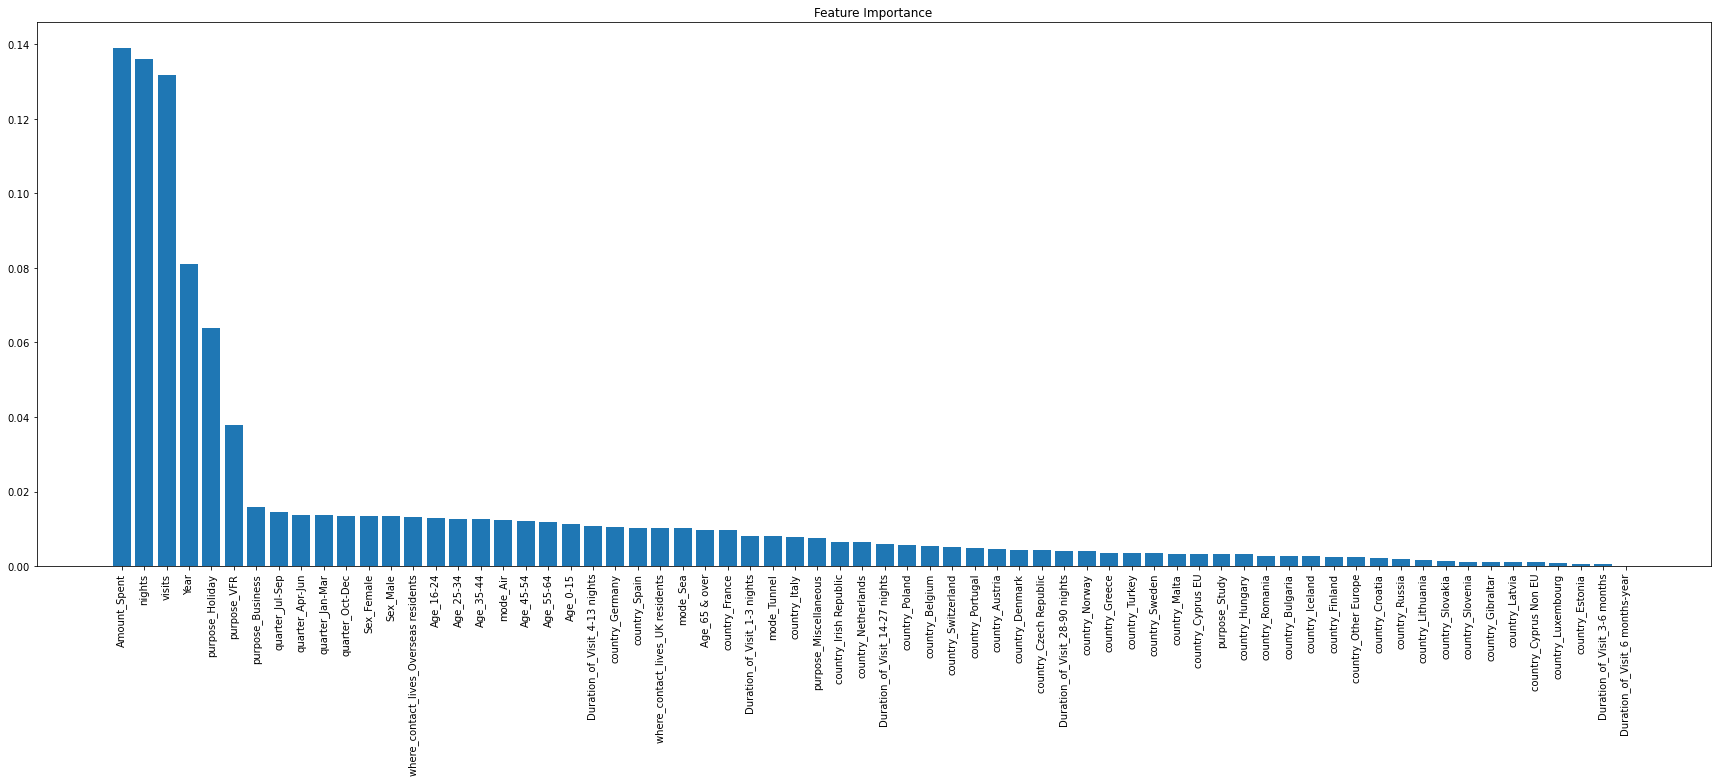

In [57]:
# Plot the feature importance scores
plt.figure(figsize=(30,10))
plt.title('Feature Importance')
plt.bar(range(train_data.shape[1]), importances[indices])
plt.xticks(range(train_data.shape[1]), train_data.columns[indices] , rotation='vertical')


The model has an accuracy of about 86%
The four most important attributes that contribute to the accuracy of the model to be used in predicting Holiday package for uk residents are:
- nights  
- Amount_Spent                                              
- visits                            
- purpose_Holiday    
- Year
Some other attributes such as purpose_VFR , country_france , all the quarters of the year , sex , purpose of business also pull weight to athe accuracy of the model.
The overall importance of all the quarters which is about 0.0565 cannot be ovelooked. 

#### fitting another model using all the features except duration of visits

In [3]:
#target variable
labels_1 = data['Holiday_Package']
#Include all other variables as feature variables
features_1 = data[['Age','Sex','country','Year','mode',
                     'purpose','quarter','where_contact_lives', 'visits','nights', 'Amount_Spent']]

print(f'label shape {labels_1.shape}')
print('First Five sample dataset for labels_1')
print(f'features shape {features_1.shape}')
print(labels_1.head())
features_1.head()

NameError: name 'data' is not defined

In [85]:
# Split our data into test and train
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(features_1,
                                                          labels_1,
                                                          test_size=0.2,
                                                          random_state=42)

print(X_train_1.shape)
print(X_test_1.shape)
print(Y_train_1.shape)
print(Y_test_1.shape)


(164977, 11)
(41245, 11)
(164977,)
(41245,)


In [86]:
#Pre-processing categorical variables

#For training data set 
X_train_cat1 = pd.DataFrame(X_train_1[['Age','Sex','country','mode',
                                  'purpose','quarter','where_contact_lives']])
X_train_cat1_encoded = pd.get_dummies(X_train_cat1)
print(f" The shape of X_train_cat_encoded is: {X_train_cat1_encoded.shape}")
print(X_train_cat1_encoded.head(2))

#For testing data set
X_test_cat1 = pd.DataFrame(X_test_1[['Age','Sex','country','mode',
                                  'purpose','quarter','where_contact_lives']])
X_test_cat1_encoded = pd.get_dummies(X_test_cat1)
print(f" The shape of X_test_cat1_encoded is: {X_test_cat1_encoded.shape}")
print(X_test_cat1_encoded.head(2))     


 The shape of X_train_cat_encoded is: (164977, 58)
       Age_0-15  Age_16-24  Age_25-34  Age_35-44  Age_45-54  Age_55-64  \
98410         0          0          1          0          0          0   
2372          0          0          1          0          0          0   

       Age_65 & over  Sex_Female  Sex_Male  country_Austria  ...  \
98410              0           1         0                0  ...   
2372               0           0         1                0  ...   

       purpose_Holiday  purpose_Miscellaneous  purpose_Study  purpose_VFR  \
98410                0                      0              0            1   
2372                 0                      0              0            0   

       quarter_Apr-Jun  quarter_Jan-Mar  quarter_Jul-Sep  quarter_Oct-Dec  \
98410                0                1                0                0   
2372                 0                1                0                0   

       where_contact_lives_Overseas residents  \
98410   

In [88]:
#normalise the continuous variables (and Year) for training set 
X_train_cont1 = X_train_1[['visits','nights','Amount_Spent', 'Year']]
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X_train_cont1)
X_train_cont1_new = pd.DataFrame(x_scaled, columns=X_train_cont1.columns, index=X_train_cont1.index)
X_train_cont1_new.head()

,visits,nights,Amount_Spent,Year
98410,0.048420,0.087289,0.016465,0.416667
2372,0.114053,0.033785,0.139574,0.000000
175337,0.309572,0.640580,0.325887,0.750000
168866,0.039111,0.068264,0.061813,0.750000
167258,0.005845,0.004687,0.020608,0.666667


In [89]:
#normalise the continuous variables (and Year) for testing set 
X_test_cont1 = X_test_1[['visits','nights','Amount_Spent', 'Year']]
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X_test_cont1)
X_test_cont1_new = pd.DataFrame(x_scaled, columns=X_test_cont1.columns, index=X_test_cont1.index)
X_test_cont1_new.head()

,visits,nights,Amount_Spent,Year
158093,0.019153,0.292423,0.065191,0.666667
110886,0.085994,0.037277,0.088590,0.416667
2913,0.022745,0.351116,0.145594,0.000000
108067,0.184595,0.066338,0.086646,0.416667
180709,0.220788,0.055817,0.004000,0.750000


In [90]:
#Add DataFrame of continuous variables and categorical variables together for a complete training set
train1_data = X_train_cat1_encoded.join(X_train_cont1)
#Do the same for test data
test1_data = X_test_cat1_encoded.join(X_test_cont1)
print(train1_data.shape)
print(test1_data.shape)

(164977, 62)
(41245, 62)


In [105]:
model1 = RandomForestClassifier(n_estimators= 10 , random_state=42)
model1.fit(train1_data , Y_train_1 )

RandomForestClassifier(n_estimators=10, random_state=42)

In [108]:
prediction_test1 =model1.predict(test1_data)

In [107]:
print("Accuracy after dropping Duration of visits= " , metrics.accuracy_score(Y_test_1, prediction_test1))

Accuracy after dropping Duration of visits=  0.8513031882652443


In [109]:
# Get the feature importance scores
importances1 = model1.feature_importances_

# Sort the feature importance scores in descending order
indices1 = np.argsort(importances1)[::-1]

# Print the feature names in order of importance
print('Feature importance:')
for i, feature in enumerate(train1_data.columns[indices1]):
    print(f'{i+1}. {feature}: {importances1[indices1[i]]:.4f}')

Feature importance:
1. nights: 0.1553
2. Amount_Spent: 0.1502
3. visits: 0.1427
4. Year: 0.0866
5. purpose_Holiday: 0.0649
6. purpose_VFR: 0.0347
7. purpose_Business: 0.0160
8. quarter_Jul-Sep: 0.0137
9. Sex_Female: 0.0131
10. Sex_Male: 0.0130
11. quarter_Jan-Mar: 0.0128
12. quarter_Apr-Jun: 0.0127
13. where_contact_lives_UK residents: 0.0124
14. quarter_Oct-Dec: 0.0122
15. Age_45-54: 0.0118
16. Age_16-24: 0.0116
17. country_France: 0.0114
18. country_Germany: 0.0112
19. Age_55-64: 0.0112
20. Age_0-15: 0.0111
21. Age_25-34: 0.0111
22. Age_35-44: 0.0111
23. mode_Air: 0.0099
24. country_Spain: 0.0091
25. country_Netherlands: 0.0089
26. Age_65 & over: 0.0088
27. country_Italy: 0.0079
28. mode_Sea: 0.0076
29. where_contact_lives_Overseas residents: 0.0074
30. country_Irish Republic: 0.0067
31. mode_Tunnel: 0.0067
32. purpose_Miscellaneous: 0.0061
33. country_Belgium: 0.0058
34. country_Poland: 0.0057
35. country_Switzerland: 0.0054
36. country_Portugal: 0.0049
37. country_Austria: 0.0048
3

##### Comparing accuracies of the two models 

- The accuracy of the first model using all the features is 0.8548014288716117 , while 
- The accuracy of the second model after dropping a column (Duration of visits) is 0.8513031882652443
- Both models have approximately equal amount of accuracy. 

#### fitting another model using all the features removing duration of visits and mode of transportation

In [99]:
#target variable
labels_2 = data['Holiday_Package']
#Include all other variables as feature variables
features_2 = data[['Age','Sex','country','Year',
                     'purpose','quarter','where_contact_lives', 'visits','nights', 'Amount_Spent']]

print(f'label shape {labels_2.shape}')
print('First Five sample dataset for labels_2')
print(f'features shape {features_2.shape}')
print(labels_2.head())
features_2.head()

label shape (206222,)
First Five sample dataset for labels_2
features shape (206222, 10)
0    Independent
1    Independent
2    Independent
3    Independent
4    Independent
Name: Holiday_Package, dtype: object


,Age,Sex,country,Year,purpose,quarter,where_contact_lives,visits,nights,Amount_Spent
0,0-15,Male,Austria,2009,Holiday,Jan-Mar,UK residents,1600.680374,11204.762616,1.103402e+06
1,0-15,Female,Austria,2009,Holiday,Jan-Mar,UK residents,1600.680374,11204.762616,1.125278e+06
2,16-24,Male,Austria,2009,Holiday,Jan-Mar,UK residents,3064.743058,20873.377956,1.622982e+06
3,16-24,Female,Austria,2009,Holiday,Jan-Mar,UK residents,2702.755561,12411.702616,1.164191e+06
4,16-24,Female,Austria,2009,Holiday,Jan-Mar,UK residents,525.351507,7354.921102,7.633357e+05


In [100]:
# Split our data into test and train
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(features_2,
                                                          labels_2,
                                                          test_size=0.2,
                                                          random_state=42)

print(X_train_2.shape)
print(X_test_2.shape)
print(Y_train_2.shape)
print(Y_test_2.shape)


(164977, 10)
(41245, 10)
(164977,)
(41245,)


In [101]:
#Pre-processing categorical variables

#For training data set 
X_train_cat2 = pd.DataFrame(X_train_2[['Age','Sex','country',
                                  'purpose','quarter','where_contact_lives']])
X_train_cat2_encoded = pd.get_dummies(X_train_cat2)
print(f" The shape of X_train_cat_encoded is: {X_train_cat2_encoded.shape}")
print(X_train_cat2_encoded.head(2))

#For testing data set
X_test_cat2 = pd.DataFrame(X_test_2[['Age','Sex','country',
                                  'purpose','quarter','where_contact_lives']])
X_test_cat2_encoded = pd.get_dummies(X_test_cat2)
print(f" The shape of X_test_cat2_encoded is: {X_test_cat2_encoded.shape}")
print(X_test_cat2_encoded.head(2))     


 The shape of X_train_cat_encoded is: (164977, 55)
       Age_0-15  Age_16-24  Age_25-34  Age_35-44  Age_45-54  Age_55-64  \
98410         0          0          1          0          0          0   
2372          0          0          1          0          0          0   

       Age_65 & over  Sex_Female  Sex_Male  country_Austria  ...  \
98410              0           1         0                0  ...   
2372               0           0         1                0  ...   

       purpose_Holiday  purpose_Miscellaneous  purpose_Study  purpose_VFR  \
98410                0                      0              0            1   
2372                 0                      0              0            0   

       quarter_Apr-Jun  quarter_Jan-Mar  quarter_Jul-Sep  quarter_Oct-Dec  \
98410                0                1                0                0   
2372                 0                1                0                0   

       where_contact_lives_Overseas residents  \
98410   

In [102]:
#normalise the continuous variables (and Year) for training set 
X_train_cont2 = X_train_2[['visits','nights','Amount_Spent', 'Year']]
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X_train_cont2)
X_train_cont2_new = pd.DataFrame(x_scaled, columns=X_train_cont2.columns, index=X_train_cont2.index)
X_train_cont2_new.head()

,visits,nights,Amount_Spent,Year
98410,0.048420,0.087289,0.016465,0.416667
2372,0.114053,0.033785,0.139574,0.000000
175337,0.309572,0.640580,0.325887,0.750000
168866,0.039111,0.068264,0.061813,0.750000
167258,0.005845,0.004687,0.020608,0.666667


In [103]:
#normalise the continuous variables (and Year) for testing set 
X_test_cont2 = X_test_2[['visits','nights','Amount_Spent', 'Year']]
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X_test_cont2)
X_test_cont2_new = pd.DataFrame(x_scaled, columns=X_test_cont2.columns, index=X_test_cont2.index)
X_test_cont2_new.head()

,visits,nights,Amount_Spent,Year
158093,0.019153,0.292423,0.065191,0.666667
110886,0.085994,0.037277,0.088590,0.416667
2913,0.022745,0.351116,0.145594,0.000000
108067,0.184595,0.066338,0.086646,0.416667
180709,0.220788,0.055817,0.004000,0.750000


In [104]:
#Add DataFrame of continuous variables and categorical variables together for a complete training set
train2_data = X_train_cat2_encoded.join(X_train_cont2)
#Do the same for test data
test2_data = X_test_cat2_encoded.join(X_test_cont2)
print(train2_data.shape)
print(test2_data.shape)

(164977, 59)
(41245, 59)


In [110]:
model2 = RandomForestClassifier(n_estimators= 10 , random_state=42)
model2.fit(train2_data , Y_train_2 )

RandomForestClassifier(n_estimators=10, random_state=42)

In [112]:
prediction_test2 =model2.predict(test2_data)

In [2]:
print("Accuracy after dropping Duration of visits and mode= " , metrics.accuracy_score(Y_test_2, prediction_test2))

NameError: name 'metrics' is not defined

##### Comparing accuracies of the three models 

- The accuracy of the first model using all the features is 0.8548014288716117 (85.5%) , while 
- The accuracy of the second model after dropping a column (Duration of visits) is 0.8513031882652443 (85.1%)
- The accuracy of the third model after dropping two columns (Duration of visits and mode) is 0.8432537277245726 (84.3%)
- The difference in accuracy of the first model and second model is 0.4% which is very small. while the model accuracy of the first model and the second model is 1.2%. 
- Conclusion: Since none of the models have a higher accuracy than the first model, we will stick to the first model.

In [1]:
Y_test_2.head

NameError: name 'Y_test_2' is not defined